# 4. Models demand per zones

In the previous notebook, models have been developed to predict the demand for bicycles per hour at an aggregate level, i.e. taking into account the overall demand for the entire service.

In order to be able to make business decisions and to know where more bicycles should be restocked, we are going to make a model for each area of Madrid.

To do this, we will first analyze how we divide into zones the whole area covered by Bicimad services.

Secondly, we will model each zone separately.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
rides_per_station = pd.read_csv("rides_per_station.csv")

In [3]:
rides_per_station

,Unnamed: 0,idunplug_station,date,weekday,hour,month,year,day,time,datetime,rides,id,address,name,total_bases,longitude,latitude,postal_code
0,0,1,2019-01-01,Tuesday,8,1,2019,1,08:00:00,2019-01-01 08:00:00,1,1,Puerta del Sol nº 1,Puerta del Sol A,30,-3.701834,40.417214,28014
1,1,1,2019-01-01,Tuesday,11,1,2019,1,11:00:00,2019-01-01 11:00:00,1,1,Puerta del Sol nº 1,Puerta del Sol A,30,-3.701834,40.417214,28014
2,2,1,2019-01-01,Tuesday,13,1,2019,1,13:00:00,2019-01-01 13:00:00,1,1,Puerta del Sol nº 1,Puerta del Sol A,30,-3.701834,40.417214,28014
3,3,1,2019-01-01,Tuesday,14,1,2019,1,14:00:00,2019-01-01 14:00:00,1,1,Puerta del Sol nº 1,Puerta del Sol A,30,-3.701834,40.417214,28014
4,4,1,2019-01-01,Tuesday,15,1,2019,1,15:00:00,2019-01-01 15:00:00,2,1,Puerta del Sol nº 1,Puerta del Sol A,30,-3.701834,40.417214,28014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2629781,2629781,270,2021-06-30,Wednesday,18,6,2021,30,18:00:00,2021-06-30 18:00:00,4,270,Calle Zurbano nº 90,Zurbano,24,-3.692810,40.438370,28003
2629782,2629782,270,2021-06-30,Wednesday,19,6,2021,30,19:00:00,2021-06-30 19:00:00,2,270,Calle Zurbano nº 90,Zurbano,24,-3.692810,40.438370,28003
2629783,2629783,270,2021-06-30,Wednesday,20,6,2021,30,20:00:00,2021-06-30 20:00:00,2,270,Calle Zurbano nº 90,Zurbano,24,-3.692810,40.438370,28003
2629784,2629784,270,2021-06-30,Wednesday,21,6,2021,30,21:00:00,2021-06-30 21:00:00,1,270,Calle Zurbano nº 90,Zurbano,24,-3.692810,40.438370,28003


## 4.1. Modeling the zones

As a first approach we are going to divide the stations depending on the postal code. 

On the first notebook we created a csv with the stations we are going to consider and the postal code, now we are going to use that file to understand how many zones we are going to consider

In [4]:
stations = pd.read_csv("all_stations.csv")
stations

,Unnamed: 0,id,address,name,total_bases,longitude,latitude,postal_code
0,0,1,Puerta del Sol nº 1,Puerta del Sol A,30,-3.701834,40.417214,28014
1,1,2,Puerta del Sol nº 1,Puerta del Sol B,30,-3.701603,40.417313,28014
2,2,3,Calle Miguel Moya nº 1,Miguel Moya,24,-3.705842,40.420589,28004
3,3,4,Plaza del Conde del Valle de Súchil nº 3,Plaza Conde Suchil,18,-3.706917,40.430294,28001
4,4,5,Calle Manuela Malasaña nº 5,Malasaña,24,-3.702587,40.428552,28004
...,...,...,...,...,...,...,...,...
259,259,265,Avenida Juan de Herrera frente a la calle Paul...,INEF,24,-3.729970,40.438960,28001
260,260,266,Avenida de la Complutense (Metro Ciudad Univer...,Ciudad Universitaria 1,24,-3.726990,40.443750,28001
261,261,267,Avenida de la Complutense (Metro Ciudad Univer...,Ciudad Universitaria 2,24,-3.726930,40.443420,28001
262,262,268,Calle José Antonio Novais frente al nº 12,Facultad Biología,24,-3.727295,40.448332,28001


In [5]:
stations_per_postal = stations.groupby(['postal_code'])['id'].count()
stations_per_postal = stations_per_postal.sort_values(ascending=False)
stations_per_postal = stations_per_postal.reset_index()

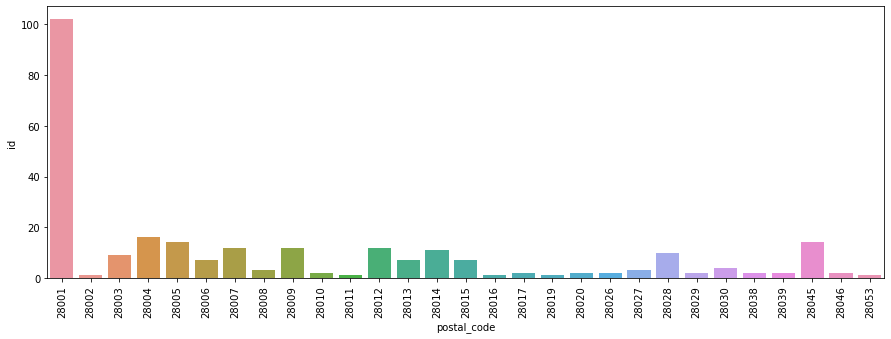

In [6]:
fig = plt.figure(figsize=(15,5))

sns.barplot(data=stations_per_postal, x='postal_code', y = 'id');
plt.xticks(rotation=90);

As we can see in the plot above the postal code 28001 (Madrid), has a lot of stations, we are going to perform a cluster analysis in this zone so the number of stations per zone is equally distributed

In [7]:
stations_28001 = stations[stations['postal_code']==28001]

In [8]:
stations_28001

,Unnamed: 0,id,address,name,total_bases,longitude,latitude,postal_code
3,3,4,Plaza del Conde del Valle de Súchil nº 3,Plaza Conde Suchil,18,-3.706917,40.430294,28001
8,8,9,Plaza de Alonso Martínez nº 5,Alonso Martínez,24,-3.695440,40.427868,28001
14,14,15,Calle Duque de Liria,Ventura Rodríguez,24,-3.713479,40.426096,28001
18,18,19,Plaza de Pedro Zerolo nº 1,Plaza de Pedro Zerolo,24,-3.699650,40.420777,28001
21,21,25,Calle Jacometrezo nº 3,Jacometrezo,24,-3.706538,40.420078,28001
...,...,...,...,...,...,...,...,...
259,259,265,Avenida Juan de Herrera frente a la calle Paul...,INEF,24,-3.729970,40.438960,28001
260,260,266,Avenida de la Complutense (Metro Ciudad Univer...,Ciudad Universitaria 1,24,-3.726990,40.443750,28001
261,261,267,Avenida de la Complutense (Metro Ciudad Univer...,Ciudad Universitaria 2,24,-3.726930,40.443420,28001
262,262,268,Calle José Antonio Novais frente al nº 12,Facultad Biología,24,-3.727295,40.448332,28001


In [9]:
from sklearn.cluster import KMeans


In [10]:
stations_28001 = stations_28001[['id', 'longitude', 'latitude']]

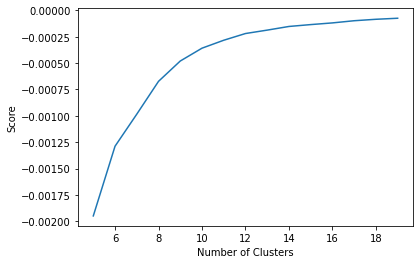

In [11]:
K_clusters = range(5,20)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = stations_28001[['latitude']]
X_axis = stations_28001[['longitude']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]
# Visualization
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.show()

From the elbow curve above we can see that from 10 clusters on the slope remains almost constant, so more than 10 clusters are not going to be useful

In [12]:
kmeans = KMeans(n_clusters = 10, init ='k-means++')
kmeans.fit(stations_28001[stations_28001.columns[1:3]]) # Compute k-means clustering.

stations_28001['cluster_label'] = kmeans.fit_predict(stations_28001[stations_28001.columns[1:3]])

centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(stations_28001[stations_28001.columns[1:3]]) # Labels of each point
stations_28001.head(10)


<ipython-input-12-f012068baa9a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stations_28001['cluster_label'] = kmeans.fit_predict(stations_28001[stations_28001.columns[1:3]])


,id,longitude,latitude,cluster_label
3,4,-3.706917,40.430294,8
8,9,-3.695440,40.427868,0
14,15,-3.713479,40.426096,8
18,19,-3.699650,40.420777,9
21,25,-3.706538,40.420078,1
23,27,-3.710692,40.417908,1
30,34,-3.711504,40.419210,1
32,36,-3.706103,40.415010,1
34,38,-3.703683,40.414676,1
41,45,-3.699115,40.412205,1


<AxesSubplot:xlabel='latitude', ylabel='longitude'>

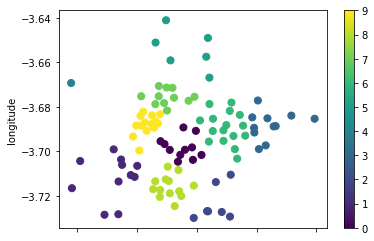

In [13]:
stations_28001.plot.scatter(x = 'latitude', y = 'longitude', c=labels, s=50, cmap='viridis')

In the plot above we see the division per zones depending on the latitude and longitude. This is the division we are going to do in order to predict the demand

In [14]:
#We create a new column on the dataframe, that contains the postal code and the number of the cluster

stations_28001['postal_code'] = "28001_" + stations_28001['cluster_label'].map(str)
stations_28001

<ipython-input-14-fc0f9081a552>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stations_28001['postal_code'] = "28001_" + stations_28001['cluster_label'].map(str)


,id,longitude,latitude,cluster_label,postal_code
3,4,-3.706917,40.430294,8,28001_8
8,9,-3.695440,40.427868,0,28001_0
14,15,-3.713479,40.426096,8,28001_8
18,19,-3.699650,40.420777,9,28001_9
21,25,-3.706538,40.420078,1,28001_1
...,...,...,...,...,...
259,265,-3.729970,40.438960,2,28001_2
260,266,-3.726990,40.443750,2,28001_2
261,267,-3.726930,40.443420,2,28001_2
262,268,-3.727295,40.448332,2,28001_2


In [15]:
stations_28001 = stations.merge(stations_28001, how='inner', left_on='id', right_on='id')
stations_28001 = stations_28001[['id', 'address', 'name', 'total_bases', 'longitude_x', 'latitude_x', 'postal_code_y']]

In [16]:
stations_28001

,id,address,name,total_bases,longitude_x,latitude_x,postal_code_y
0,4,Plaza del Conde del Valle de Súchil nº 3,Plaza Conde Suchil,18,-3.706917,40.430294,28001_8
1,9,Plaza de Alonso Martínez nº 5,Alonso Martínez,24,-3.695440,40.427868,28001_0
2,15,Calle Duque de Liria,Ventura Rodríguez,24,-3.713479,40.426096,28001_8
3,19,Plaza de Pedro Zerolo nº 1,Plaza de Pedro Zerolo,24,-3.699650,40.420777,28001_9
4,25,Calle Jacometrezo nº 3,Jacometrezo,24,-3.706538,40.420078,28001_1
...,...,...,...,...,...,...,...
97,265,Avenida Juan de Herrera frente a la calle Paul...,INEF,24,-3.729970,40.438960,28001_2
98,266,Avenida de la Complutense (Metro Ciudad Univer...,Ciudad Universitaria 1,24,-3.726990,40.443750,28001_2
99,267,Avenida de la Complutense (Metro Ciudad Univer...,Ciudad Universitaria 2,24,-3.726930,40.443420,28001_2
100,268,Calle José Antonio Novais frente al nº 12,Facultad Biología,24,-3.727295,40.448332,28001_2


In [17]:
stations_28001['longitude'] =stations_28001['longitude_x'] 
stations_28001['latitude'] =stations_28001['latitude_x'] 
stations_28001['postal_code'] = stations_28001['postal_code_y']
stations_28001 = stations_28001.drop(['longitude_x'], axis=1)
stations_28001 = stations_28001.drop(['latitude_x'], axis=1)
stations_28001 = stations_28001.drop(['postal_code_y'], axis=1)

In [18]:
stations_28001

,id,address,name,total_bases,longitude,latitude,postal_code
0,4,Plaza del Conde del Valle de Súchil nº 3,Plaza Conde Suchil,18,-3.706917,40.430294,28001_8
1,9,Plaza de Alonso Martínez nº 5,Alonso Martínez,24,-3.695440,40.427868,28001_0
2,15,Calle Duque de Liria,Ventura Rodríguez,24,-3.713479,40.426096,28001_8
3,19,Plaza de Pedro Zerolo nº 1,Plaza de Pedro Zerolo,24,-3.699650,40.420777,28001_9
4,25,Calle Jacometrezo nº 3,Jacometrezo,24,-3.706538,40.420078,28001_1
...,...,...,...,...,...,...,...
97,265,Avenida Juan de Herrera frente a la calle Paul...,INEF,24,-3.729970,40.438960,28001_2
98,266,Avenida de la Complutense (Metro Ciudad Univer...,Ciudad Universitaria 1,24,-3.726990,40.443750,28001_2
99,267,Avenida de la Complutense (Metro Ciudad Univer...,Ciudad Universitaria 2,24,-3.726930,40.443420,28001_2
100,268,Calle José Antonio Novais frente al nº 12,Facultad Biología,24,-3.727295,40.448332,28001_2


Now we have a dataframe with the cluster we've made, we are going to merge this data frame with the rest of the postal codes

In [19]:
stations = stations[stations['postal_code'] != 28001]
stations = stations [['id','address', 'name', 'total_bases', 'longitude', 'latitude', 'postal_code']]
stations

,id,address,name,total_bases,longitude,latitude,postal_code
0,1,Puerta del Sol nº 1,Puerta del Sol A,30,-3.701834,40.417214,28014
1,2,Puerta del Sol nº 1,Puerta del Sol B,30,-3.701603,40.417313,28014
2,3,Calle Miguel Moya nº 1,Miguel Moya,24,-3.705842,40.420589,28004
4,5,Calle Manuela Malasaña nº 5,Malasaña,24,-3.702587,40.428552,28004
5,6,Calle Fuencarral nº 108,Fuencarral,27,-3.702050,40.428520,28004
...,...,...,...,...,...,...,...
245,251,Calle Cartagena nº 34,Cartagena,24,-3.670120,40.435030,28028
246,252,Calle Isaac Peral nº 44,Hospital Clínico,24,-3.717570,40.440030,28003
247,253,Calle Galileo nº 63,Galileo,24,-3.710190,40.436400,28015
249,270,Calle Zurbano nº 90,Zurbano,24,-3.692810,40.438370,28003


In [20]:
#We append both dataframes to have all the information in one dataframe
stations = stations.append(stations_28001)
stations

,id,address,name,total_bases,longitude,latitude,postal_code
0,1,Puerta del Sol nº 1,Puerta del Sol A,30,-3.701834,40.417214,28014
1,2,Puerta del Sol nº 1,Puerta del Sol B,30,-3.701603,40.417313,28014
2,3,Calle Miguel Moya nº 1,Miguel Moya,24,-3.705842,40.420589,28004
4,5,Calle Manuela Malasaña nº 5,Malasaña,24,-3.702587,40.428552,28004
5,6,Calle Fuencarral nº 108,Fuencarral,27,-3.702050,40.428520,28004
...,...,...,...,...,...,...,...
97,265,Avenida Juan de Herrera frente a la calle Paul...,INEF,24,-3.729970,40.438960,28001_2
98,266,Avenida de la Complutense (Metro Ciudad Univer...,Ciudad Universitaria 1,24,-3.726990,40.443750,28001_2
99,267,Avenida de la Complutense (Metro Ciudad Univer...,Ciudad Universitaria 2,24,-3.726930,40.443420,28001_2
100,268,Calle José Antonio Novais frente al nº 12,Facultad Biología,24,-3.727295,40.448332,28001_2


Now we are going to plot the number of stations per zone

In [21]:
stations_per_postal = stations.groupby(['postal_code'])['id'].count()
stations_per_postal = stations_per_postal.sort_values(ascending=False)
stations_per_postal = stations_per_postal.reset_index()

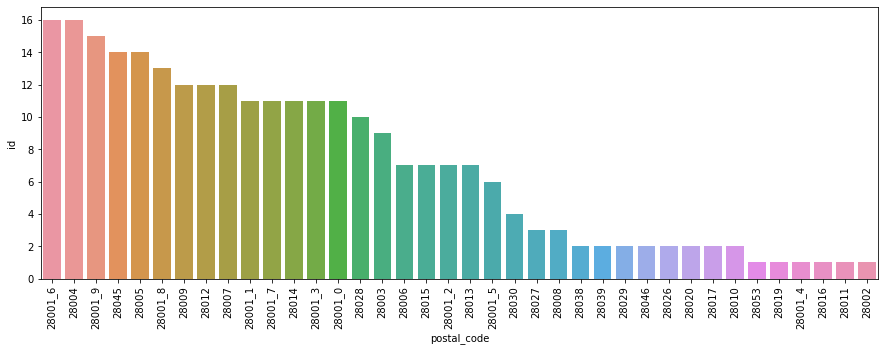

In [22]:
fig = plt.figure(figsize=(15,5))

sns.barplot(data=stations_per_postal, x='postal_code', y = 'id');
plt.xticks(rotation=90);

Distribution now makes sense, the zone with more stations is located in the center, and has 36 stations.

## 4.2. Models by area

Now that we have the areas defined we are going to predict the demand of each zone. We are going to do the same process for each of the 36 stations. 

We are going to make the detailed models for one station, and then we will do the same process for the others.

We are going to use the same models that we used in the previous notebook, where we predict the global demand

In [23]:
rides_per_station = rides_per_station[['datetime','date', 'idunplug_station', 'weekday', 'hour', 
                                       'month', 'year', 'time', 'rides', 'total_bases','address', 'name', 'id']]

In [24]:
rides_per_station = rides_per_station.merge(stations, how='inner', left_on='id', right_on='id')

In [25]:
rides_per_station = rides_per_station[['datetime', 'date', 'idunplug_station', 'weekday', 'hour', 'month','rides',
                                       'year', 'time', 'total_bases_x', 'address_x', 'name_x', 'longitude', 'latitude', 
                                       'postal_code']]
rides_per_station['total_bases'] = rides_per_station['total_bases_x']
rides_per_station = rides_per_station.drop('total_bases_x', axis=1)
rides_per_station['address'] = rides_per_station['address_x']
rides_per_station = rides_per_station.drop('address_x', axis=1)
rides_per_station['name'] = rides_per_station['name_x']
rides_per_station = rides_per_station.drop('name_x', axis=1)

In [26]:
rides_per_station

,datetime,date,idunplug_station,weekday,hour,month,rides,year,time,longitude,latitude,postal_code,total_bases,address,name
0,2019-01-01 08:00:00,2019-01-01,1,Tuesday,8,1,1,2019,08:00:00,-3.701834,40.417214,28014,30,Puerta del Sol nº 1,Puerta del Sol A
1,2019-01-01 11:00:00,2019-01-01,1,Tuesday,11,1,1,2019,11:00:00,-3.701834,40.417214,28014,30,Puerta del Sol nº 1,Puerta del Sol A
2,2019-01-01 13:00:00,2019-01-01,1,Tuesday,13,1,1,2019,13:00:00,-3.701834,40.417214,28014,30,Puerta del Sol nº 1,Puerta del Sol A
3,2019-01-01 14:00:00,2019-01-01,1,Tuesday,14,1,1,2019,14:00:00,-3.701834,40.417214,28014,30,Puerta del Sol nº 1,Puerta del Sol A
4,2019-01-01 15:00:00,2019-01-01,1,Tuesday,15,1,2,2019,15:00:00,-3.701834,40.417214,28014,30,Puerta del Sol nº 1,Puerta del Sol A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2629781,2021-06-30 18:00:00,2021-06-30,270,Wednesday,18,6,4,2021,18:00:00,-3.692810,40.438370,28003,24,Calle Zurbano nº 90,Zurbano
2629782,2021-06-30 19:00:00,2021-06-30,270,Wednesday,19,6,2,2021,19:00:00,-3.692810,40.438370,28003,24,Calle Zurbano nº 90,Zurbano
2629783,2021-06-30 20:00:00,2021-06-30,270,Wednesday,20,6,2,2021,20:00:00,-3.692810,40.438370,28003,24,Calle Zurbano nº 90,Zurbano
2629784,2021-06-30 21:00:00,2021-06-30,270,Wednesday,21,6,1,2021,21:00:00,-3.692810,40.438370,28003,24,Calle Zurbano nº 90,Zurbano


### 4.2.1. Demand prediction for zone: 28001_0

In [27]:
rides_per_zone_1 = rides_per_station[rides_per_station['postal_code']=="28001_0"]
#rides_per_zone_1 = rides_per_zone_1

In [28]:
rides_per_zone_1 = rides_per_zone_1.groupby(['date', 'weekday', 'hour', 'month',
                                             'year', 'time','datetime']).rides.sum().reset_index()

In [29]:
rides_per_zone_1

,date,weekday,hour,month,year,time,datetime,rides
0,2018-12-31,Monday,23,12,2018,23:00:00,2018-12-31 23:00:00,7
1,2019-01-01,Tuesday,0,1,2019,00:00:00,2019-01-01 00:00:00,9
2,2019-01-01,Tuesday,1,1,2019,01:00:00,2019-01-01 01:00:00,8
3,2019-01-01,Tuesday,2,1,2019,02:00:00,2019-01-01 02:00:00,2
4,2019-01-01,Tuesday,3,1,2019,03:00:00,2019-01-01 03:00:00,3
...,...,...,...,...,...,...,...,...
18836,2021-06-30,Wednesday,19,6,2021,19:00:00,2021-06-30 19:00:00,47
18837,2021-06-30,Wednesday,20,6,2021,20:00:00,2021-06-30 20:00:00,39
18838,2021-06-30,Wednesday,21,6,2021,21:00:00,2021-06-30 21:00:00,30
18839,2021-06-30,Wednesday,22,6,2021,22:00:00,2021-06-30 22:00:00,36


In [30]:
#Converting the column datetime to a datetime format
rides_per_zone_1['datetime'] = pd.to_datetime(rides_per_zone_1['datetime'])


In [31]:
#Resample to fill all values of the time series
rides_per_zone_1.set_index('datetime',inplace=True)
rides_per_zone_1.sort_index(inplace=True)
rides_per_zone_1.resample('1H').sum()
rides_per_zone_1

,date,weekday,hour,month,year,time,rides
datetime,,,,,,,
2018-12-31 23:00:00,2018-12-31,Monday,23,12,2018,23:00:00,7
2019-01-01 00:00:00,2019-01-01,Tuesday,0,1,2019,00:00:00,9
2019-01-01 01:00:00,2019-01-01,Tuesday,1,1,2019,01:00:00,8
2019-01-01 02:00:00,2019-01-01,Tuesday,2,1,2019,02:00:00,2
2019-01-01 03:00:00,2019-01-01,Tuesday,3,1,2019,03:00:00,3
...,...,...,...,...,...,...,...
2021-06-30 19:00:00,2021-06-30,Wednesday,19,6,2021,19:00:00,47
2021-06-30 20:00:00,2021-06-30,Wednesday,20,6,2021,20:00:00,39
2021-06-30 21:00:00,2021-06-30,Wednesday,21,6,2021,21:00:00,30


##### Plotting the time series

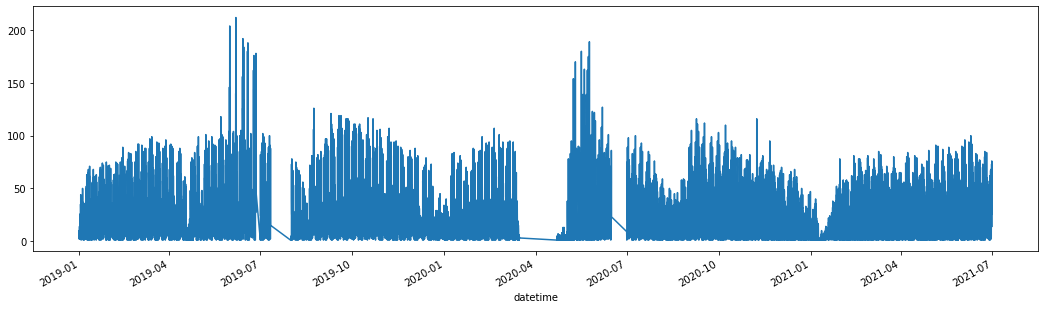

In [32]:
plt.figure(figsize=(18,5))

rides_per_zone_1['rides'].plot()
plt.show()

##### Adding lag values : feature engineering

In [33]:
rides_per_zone_1['rides_lag_7'] = rides_per_zone_1['rides'].shift(7*24)
rides_per_zone_1['rides_lag_1'] = rides_per_zone_1['rides'].shift(1*24)
rides_per_zone_1['rides_lag_2'] = rides_per_zone_1['rides'].shift(2*24)
rides_per_zone_1['rides_lag_1_month'] = rides_per_zone_1['rides'].shift(30*24)
rides_per_zone_1['rides_lag_12_hours'] = rides_per_zone_1['rides'].shift(12)

##### Correlation between variables

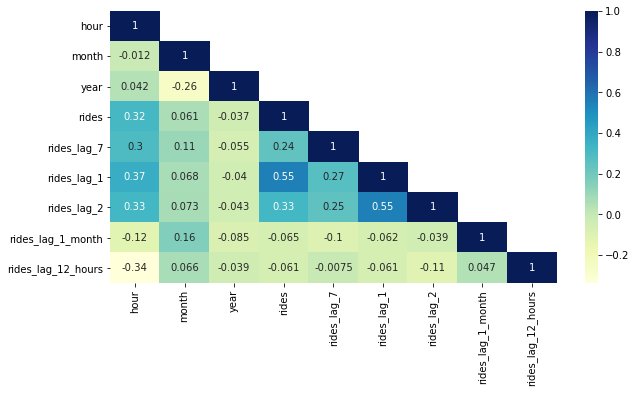

In [34]:
corr_matrix = rides_per_zone_1.corr()
fig = plt.figure(figsize=(10, 5))

mask = np.array(corr_matrix)
mask[np.tril_indices_from(mask)] = False

sns.heatmap(corr_matrix, mask = mask, annot=True, cbar=True,cmap="YlGnBu")
plt.show()

##### Evaluating models

In [35]:
from sklearn import metrics
def calculate_metrics(forecast,demand):
    mse = metrics.mean_squared_error(forecast,demand)
    mae = metrics.mean_absolute_error(forecast,demand)
    rmse = np.sqrt(metrics.mean_squared_error(forecast,demand))
    r2 = metrics.r2_score(forecast,demand)
    return mse, mae, rmse, r2

In [36]:
evaluation_model_1 = pd.DataFrame(columns=["model", "MSE", "MAE", "RMSE", "R2"])

#### 4.2.1.1. Machine learning models

###### One-hot encoding for categorical variables

In [38]:
rides_per_zone_1 = pd.get_dummies(rides_per_zone_1, columns = ['weekday', 'hour', 'month'])

In [39]:
#We save the columns we are using as predictors in columns for model and the target we want to predict in target
columns_for_model = [column for column in rides_per_zone_1.columns
                      if column.startswith(('weekday', 'hour', 'month'))]

#columns_for_model.extend(['is_holiday_x', 'is_weekend'])

target = 'rides'

##### Division in train and test

We are going to consider the last 14 days of information as the test set to evaluate the model

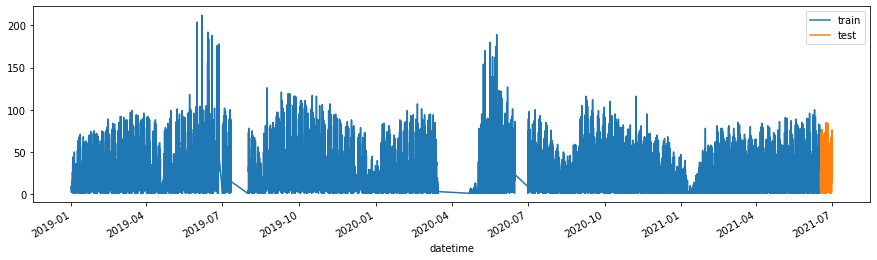

In [40]:
steps = 24*14 # 14 days
train = rides_per_zone_1[:-steps]
test = rides_per_zone_1[-steps:]

fig, ax = plt.subplots(figsize=(15, 4))
train['rides'].plot(ax=ax, label='train')
test['rides'].plot(ax=ax, label='test')
ax.legend();

#### Random Forest

In [41]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.ForecasterAutoregCustom import ForecasterAutoregCustom
from skforecast.ForecasterAutoregMultiOutput import ForecasterAutoregMultiOutput
from skforecast.model_selection import grid_search_forecaster
from skforecast.model_selection import backtesting_forecaster
import warnings
warnings.filterwarnings('ignore')

We train a forecaster autoregressor with a Random Forest regressor, using the lag values of the past 7 days at the same hour as predictors

In [42]:
forecaster = ForecasterAutoreg(regressor = RandomForestRegressor(random_state=123),
                              lags = [24,24*2,24*3,24*4,24*5,24*6,24*7])
forecaster.fit(y=train['rides'])
forecaster

ForecasterAutoreg 
Regressor: RandomForestRegressor(random_state=123) 
Lags: [ 24  48  72  96 120 144 168] 
Window size: 168 
Included exogenous: False 
Type of exogenous variable: None 
Exogenous variables names: None 
Training range: [0, 18504] 
Training index type: RangeIndex 
Training index frequency: 1 
Regressor parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 123, 'verbose': 0, 'warm_start': False} 
Creation date: 2022-05-29 17:24:11 
Last fit date: 2022-05-29 17:24:18 
Skforecast version: 0.4.3 

In [43]:
steps = 14*24 #Predictions for the next 14 days
predictions = forecaster.predict(steps = steps)
predictions = predictions.reset_index()
predictions = predictions['pred']
predictions

0      76.08
1      52.99
2      42.73
3      35.08
4      35.02
       ...  
331    49.15
332    43.14
333    41.99
334    38.23
335    46.95
Name: pred, Length: 336, dtype: float64

In [44]:
demand = test['rides']
demand = demand.reset_index()
demand = demand['rides']
demand

0       6
1      18
2      27
3      25
4      14
       ..
331    47
332    39
333    30
334    36
335    14
Name: rides, Length: 336, dtype: int64

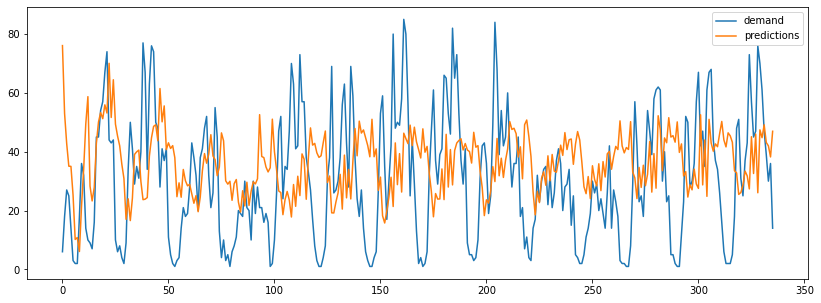

In [45]:
#Plot of demand and predictions
fig, ax = plt.subplots(figsize=(14, 5))

plt.plot(demand, label='demand')
plt.plot(predictions, label = 'predictions')
ax.legend()
plt.show()

In [46]:
#Metrics for the model
mse, mae, rmse, r2 = calculate_metrics(predictions, demand)
evaluation_model_1 = evaluation_model_1.append({'model':'ForecastAutoreg', 'MSE': mse, 'MAE': mae, 'RMSE': rmse,  'R2':r2},
                                             ignore_index=True)
evaluation_model_1

,model,MSE,MAE,RMSE,R2
0,ForecastAutoreg,612.384337,20.105952,24.7464,-4.888336


In [219]:
#Looking for the best hyperparameters: grid search

steps = 14*24
forecaster = ForecasterAutoreg(regressor = RandomForestRegressor(random_state=123),
                              lags = [24*7])
#Number of lags used as predictors
lags_grid = [[24,24*2,24*3,24*4,24*5,24*6,24*7], [24,24*7], [24*7]]

#Regressor hyperparameters
param_grid = {'n_estimators':[100,500],
             'max_depth': [3,5,10]}

#Grid search
grid_seach = grid_search_forecaster(forecaster = forecaster,
                                   y = train['rides'],
                                   param_grid = param_grid,
                                   lags_grid = lags_grid,
                                   steps = steps,
                                   refit = True,
                                   metric = 'mean_squared_error',
                                   initial_train_size = int(len(train)*0.25),
                                    fixed_train_size=False,
                                    return_best=True,
                                    verbose=False)

loop param_grid:   0%|                                              | 0/6 [00:00<?, ?it/s]

Number of models compared: 18


C:\Users\paula\Anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
C:\Users\paula\Anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
C:\Users\paula\Anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
C:\Users\paula\Anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
C:\Users\paula\Anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(


C:\Users\paula\Anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
C:\Users\paula\Anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
C:\Users\paula\Anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
C:\Users\paula\Anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
C:\Users\paula\Anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(


C:\Users\paula\Anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
C:\Users\paula\Anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(

loop param_grid:  17%|██████▏                              | 1/6 [01:55<09:35, 115.17s/it]C:\Users\paula\Anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
C:\Users\paula\Anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
C:\Users\paula\Anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex 

C:\Users\paula\Anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
C:\Users\paula\Anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
C:\Users\paula\Anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
C:\Users\paula\Anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
C:\Users\paula\Anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(


C:\Users\paula\Anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
C:\Users\paula\Anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
C:\Users\paula\Anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
C:\Users\paula\Anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(

loop param_grid:  33%|████████████▎                        | 2/6 [11:26<25:33, 383.40s/it]C:\Users\paula\Anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex 

C:\Users\paula\Anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
C:\Users\paula\Anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
C:\Users\paula\Anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
C:\Users\paula\Anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
C:\Users\paula\Anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(


C:\Users\paula\Anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
C:\Users\paula\Anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
C:\Users\paula\Anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
C:\Users\paula\Anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
C:\Users\paula\Anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(


C:\Users\paula\Anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
C:\Users\paula\Anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
C:\Users\paula\Anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
C:\Users\paula\Anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
C:\Users\paula\Anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(


C:\Users\paula\Anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
C:\Users\paula\Anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
C:\Users\paula\Anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
C:\Users\paula\Anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
C:\Users\paula\Anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(


C:\Users\paula\Anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
C:\Users\paula\Anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
C:\Users\paula\Anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
C:\Users\paula\Anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
C:\Users\paula\Anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(


C:\Users\paula\Anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
C:\Users\paula\Anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
C:\Users\paula\Anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
C:\Users\paula\Anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
C:\Users\paula\Anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(


C:\Users\paula\Anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
C:\Users\paula\Anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
C:\Users\paula\Anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
C:\Users\paula\Anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
C:\Users\paula\Anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(


C:\Users\paula\Anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
C:\Users\paula\Anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
C:\Users\paula\Anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
C:\Users\paula\Anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
C:\Users\paula\Anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(


C:\Users\paula\Anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
C:\Users\paula\Anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
C:\Users\paula\Anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
C:\Users\paula\Anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
C:\Users\paula\Anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(


C:\Users\paula\Anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
C:\Users\paula\Anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
C:\Users\paula\Anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
C:\Users\paula\Anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
C:\Users\paula\Anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(


C:\Users\paula\Anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
C:\Users\paula\Anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
C:\Users\paula\Anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
C:\Users\paula\Anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
C:\Users\paula\Anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(


C:\Users\paula\Anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
C:\Users\paula\Anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
C:\Users\paula\Anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
C:\Users\paula\Anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
C:\Users\paula\Anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(


C:\Users\paula\Anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
C:\Users\paula\Anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
C:\Users\paula\Anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
C:\Users\paula\Anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
C:\Users\paula\Anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(


C:\Users\paula\Anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
C:\Users\paula\Anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
C:\Users\paula\Anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
C:\Users\paula\Anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
C:\Users\paula\Anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(


C:\Users\paula\Anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
C:\Users\paula\Anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
C:\Users\paula\Anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
C:\Users\paula\Anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
C:\Users\paula\Anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(


C:\Users\paula\Anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
C:\Users\paula\Anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
C:\Users\paula\Anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
C:\Users\paula\Anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
C:\Users\paula\Anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(


C:\Users\paula\Anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
C:\Users\paula\Anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
C:\Users\paula\Anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
C:\Users\paula\Anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
C:\Users\paula\Anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(


C:\Users\paula\Anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
C:\Users\paula\Anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
C:\Users\paula\Anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
C:\Users\paula\Anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
C:\Users\paula\Anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(


C:\Users\paula\Anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
C:\Users\paula\Anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
C:\Users\paula\Anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
C:\Users\paula\Anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
C:\Users\paula\Anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(


C:\Users\paula\Anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
C:\Users\paula\Anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
C:\Users\paula\Anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
C:\Users\paula\Anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
C:\Users\paula\Anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(


C:\Users\paula\Anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
C:\Users\paula\Anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
C:\Users\paula\Anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
C:\Users\paula\Anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
C:\Users\paula\Anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(


C:\Users\paula\Anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
C:\Users\paula\Anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
C:\Users\paula\Anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
C:\Users\paula\Anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
C:\Users\paula\Anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(


C:\Users\paula\Anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
C:\Users\paula\Anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
C:\Users\paula\Anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
C:\Users\paula\Anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
C:\Users\paula\Anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(


C:\Users\paula\Anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
C:\Users\paula\Anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
C:\Users\paula\Anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
C:\Users\paula\Anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
C:\Users\paula\Anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(


C:\Users\paula\Anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
C:\Users\paula\Anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
C:\Users\paula\Anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
C:\Users\paula\Anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
C:\Users\paula\Anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(


C:\Users\paula\Anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
C:\Users\paula\Anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
C:\Users\paula\Anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
C:\Users\paula\Anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
C:\Users\paula\Anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(


C:\Users\paula\Anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
C:\Users\paula\Anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
C:\Users\paula\Anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
C:\Users\paula\Anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
C:\Users\paula\Anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(


C:\Users\paula\Anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
C:\Users\paula\Anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
C:\Users\paula\Anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
C:\Users\paula\Anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
C:\Users\paula\Anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(


C:\Users\paula\Anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
C:\Users\paula\Anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
C:\Users\paula\Anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
C:\Users\paula\Anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
C:\Users\paula\Anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(


C:\Users\paula\Anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
C:\Users\paula\Anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
C:\Users\paula\Anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
C:\Users\paula\Anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
C:\Users\paula\Anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(


C:\Users\paula\Anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
C:\Users\paula\Anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
C:\Users\paula\Anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
C:\Users\paula\Anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
C:\Users\paula\Anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(


C:\Users\paula\Anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
C:\Users\paula\Anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
C:\Users\paula\Anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
C:\Users\paula\Anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
C:\Users\paula\Anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(


`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [ 24  48  72  96 120 144 168] 
  Parameters: {'max_depth': 5, 'n_estimators': 100}
  Backtesting metric: 3340.211789782864



C:\Users\paula\Anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(


In [221]:
#Results of the grid search
grid_seach

,lags,params,metric,max_depth,n_estimators
2,"[24, 48, 72, 96, 120, 144, 168]","{'max_depth': 5, 'n_estimators': 100}",3340.211790,5,100
3,"[24, 48, 72, 96, 120, 144, 168]","{'max_depth': 5, 'n_estimators': 500}",3343.340955,5,500
5,"[24, 48, 72, 96, 120, 144, 168]","{'max_depth': 10, 'n_estimators': 500}",3384.224528,10,500
4,"[24, 48, 72, 96, 120, 144, 168]","{'max_depth': 10, 'n_estimators': 100}",3403.263176,10,100
13,[168],"{'max_depth': 3, 'n_estimators': 500}",3440.770247,3,500
15,[168],"{'max_depth': 5, 'n_estimators': 500}",3443.727651,5,500
12,[168],"{'max_depth': 3, 'n_estimators': 100}",3444.832883,3,100
14,[168],"{'max_depth': 5, 'n_estimators': 100}",3446.547958,5,100
17,[168],"{'max_depth': 10, 'n_estimators': 500}",3473.581676,10,500
16,[168],"{'max_depth': 10, 'n_estimators': 100}",3479.332452,10,100


Best results are obtained with variable lags of the last 7 days at the same hour and a Random Forest hyperparameters max_depth = 5 and n_estimators = 100

In [47]:
#We create and train the model with the hyperparameters obtained
forecaster = ForecasterAutoreg(regressor = RandomForestRegressor(max_depth=5,n_estimators=100, random_state = 123),
                               lags = [24,48,72,96,120,144,168])
forecaster.fit(y=train['rides'])
forecaster

ForecasterAutoreg 
Regressor: RandomForestRegressor(max_depth=5, random_state=123) 
Lags: [ 24  48  72  96 120 144 168] 
Window size: 168 
Included exogenous: False 
Type of exogenous variable: None 
Exogenous variables names: None 
Training range: [0, 18504] 
Training index type: RangeIndex 
Training index frequency: 1 
Regressor parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 5, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 123, 'verbose': 0, 'warm_start': False} 
Creation date: 2022-05-29 17:24:53 
Last fit date: 2022-05-29 17:24:55 
Skforecast version: 0.4.3 

In [48]:
steps = 14*24 #Predictions for the next 14 days
predictions = forecaster.predict(steps = steps)
predictions = predictions.reset_index()
predictions = predictions['pred']
demand = test['rides']
demand = demand.reset_index()
demand = demand['rides']

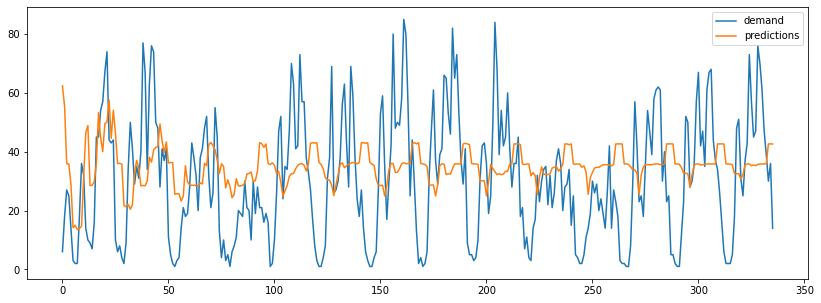

In [49]:
#Plot of demand and predictions
fig, ax = plt.subplots(figsize=(14, 5))

plt.plot(demand, label='demand')
plt.plot(predictions, label = 'predictions')
ax.legend()
plt.show()

In [50]:
#Metrics for the model
mse, mae, rmse, r2 = calculate_metrics(predictions, demand)
evaluation_model_1 = evaluation_model_1.append({'model':'ForecastAutoreg', 'MSE': mse, 'MAE': mae, 'RMSE': rmse,  'R2':r2},
                                             ignore_index=True)
evaluation_model_1

,model,MSE,MAE,RMSE,R2
0,ForecastAutoreg,612.384337,20.105952,24.746400,-4.888336
1,ForecastAutoreg,485.862672,18.281056,22.042293,-11.156086


In [51]:
#Backtesting
steps = 14*24
n_backtesting = 24*30*2 # Se separan para el backtest los últimos 9 años

metric, backtesting_predictions = backtesting_forecaster(
                                    forecaster         = forecaster,
                                    y                  = train['rides'],
                                    initial_train_size = len(train) - n_backtesting,
                                    fixed_train_size   = False,
                                    steps              = steps,
                                    refit              = True,
                                    metric             = 'mean_squared_error',
                                    verbose            = True
                                 )
metric


Information of backtesting process
----------------------------------
Number of observations used for initial training: 17065
Number of observations used for backtesting: 1440
    Number of folds: 5
    Number of steps per fold: 336
    Last fold only includes 96 observations.

Data partition in fold: 0
    Training:   2018-12-31 23:00:00 -- 2021-04-11 11:00:00
    Validation: 2021-04-11 12:00:00 -- 2021-04-28 08:00:00
Data partition in fold: 1
    Training:   2018-12-31 23:00:00 -- 2021-04-28 08:00:00
    Validation: 2021-04-28 09:00:00 -- 2021-05-14 07:00:00
Data partition in fold: 2
    Training:   2018-12-31 23:00:00 -- 2021-05-14 07:00:00
    Validation: 2021-05-14 08:00:00 -- 2021-05-29 02:00:00
Data partition in fold: 3
    Training:   2018-12-31 23:00:00 -- 2021-05-29 02:00:00
    Validation: 2021-05-29 03:00:00 -- 2021-06-12 12:00:00
Data partition in fold: 4
    Training:   2018-12-31 23:00:00 -- 2021-06-12 12:00:00
    Validation: 2021-06-12 13:00:00 -- 2021-06-16 18:00:00



485.8238491973605

In [52]:
#Feature importance
feature_importance = forecaster.get_feature_importance()
feature_importance = feature_importance.sort_values(by='importance', ascending = False)
feature_importance

,feature,importance
0,lag_24,0.837586
5,lag_144,0.042917
6,lag_168,0.035501
4,lag_120,0.035426
3,lag_96,0.019664
2,lag_72,0.018032
1,lag_48,0.010875


The most important feature is the demand of the last 24 hours

###### Including exogenous variables

We saved the exogenous variables we want to use for our model (hour, weekday, month) in the variable ``columns_for_model``

In [57]:
#Create and train forecaster
forecaster = ForecasterAutoreg(regressor = RandomForestRegressor(random_state=123),
                              lags = [24,48,72,96,120,144,168])
forecaster.fit(y=train['rides'], exog = train[columns_for_model])
forecaster

ForecasterAutoreg 
Regressor: RandomForestRegressor(random_state=123) 
Lags: [ 24  48  72  96 120 144 168] 
Window size: 168 
Included exogenous: True 
Type of exogenous variable: <class 'pandas.core.frame.DataFrame'> 
Exogenous variables names: ['weekday_Friday', 'weekday_Monday', 'weekday_Saturday', 'weekday_Sunday', 'weekday_Thursday', 'weekday_Tuesday', 'weekday_Wednesday', 'hour_0', 'hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5', 'hour_6', 'hour_7', 'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12', 'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18', 'hour_19', 'hour_20', 'hour_21', 'hour_22', 'hour_23', 'month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'month_12'] 
Training range: [0, 18504] 
Training index type: RangeIndex 
Training index frequency: 1 
Regressor parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 'auto', 'max_l

In [58]:
#Predictions and demand
predictions = forecaster.predict(steps=steps, exog = test[columns_for_model])
predictions = predictions.reset_index()
predictions = predictions['pred']
demand = test['rides']
demand = demand.reset_index()
demand = demand['rides']

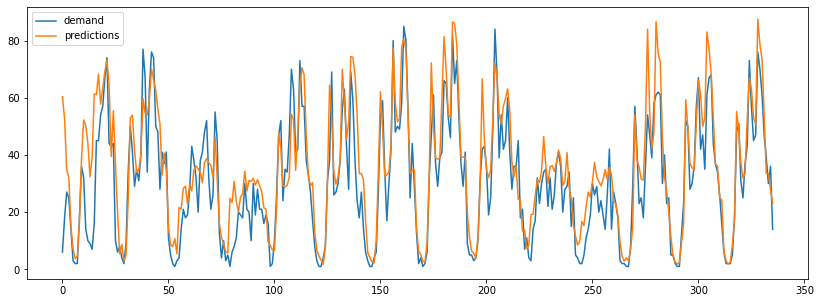

In [59]:
#Plot of demand and predictions
fig, ax = plt.subplots(figsize=(14, 5))

plt.plot(demand, label='demand')
plt.plot(predictions, label = 'predictions')
ax.legend()
plt.show()

In [60]:
#Metrics of the model
mse, mae, rmse, r2 = calculate_metrics(predictions, demand)
evaluation_model_1 = evaluation_model_1.append({'model':'ForecastAutoreg with exog. variables', 
                                                'MSE': mse, 'MAE': mae, 'RMSE': rmse,  'R2':r2},
                                             ignore_index=True)
evaluation_model_1

,model,MSE,MAE,RMSE,R2
0,ForecastAutoreg,612.384337,20.105952,24.746400,-4.888336
1,ForecastAutoreg,485.862672,18.281056,22.042293,-11.156086
2,ForecastAutoreg with exog. variables,126.021387,8.160119,11.225925,0.717933


In [249]:
#Looking for the best hyperparameters: grid search

steps = 14*24
forecaster = ForecasterAutoreg(regressor = RandomForestRegressor(random_state=123),
                              lags = [24*7])
#Number of lags used as predictors
lags_grid = [[24,24*2,24*3,24*4,24*5,24*6,24*7], [24*7]]

#Regressor hyperparameters
param_grid = {'n_estimators':[100,200,500],
             'max_depth': [3,5,10]}

#Grid search
grid_seach = grid_search_forecaster(forecaster = forecaster,
                                   y = train['rides'],
                                    exog = train[columns_for_model],
                                   param_grid = param_grid,
                                   lags_grid = lags_grid,
                                   steps = steps,
                                   refit = True,
                                   metric = 'mean_squared_error',
                                   initial_train_size = int(len(train)*0.25),
                                    fixed_train_size=False,
                                    return_best=True,
                                    verbose=False)

loop param_grid:   0%|                                              | 0/9 [00:00<?, ?it/s]

Number of models compared: 18



loop lags_grid: 100%|███████████████████████████████████| 2/2 [2:27:06<00:00, 4413.15s/it]


`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [168] 
  Parameters: {'max_depth': 10, 'n_estimators': 500}
  Backtesting metric: 1807.6882209501296



In [250]:
#Results of grid search
grid_seach


,lags,params,metric,max_depth,n_estimators
17,[168],"{'max_depth': 10, 'n_estimators': 500}",1807.688221,10,500
15,[168],"{'max_depth': 10, 'n_estimators': 100}",1811.862795,10,100
16,[168],"{'max_depth': 10, 'n_estimators': 200}",1812.459364,10,200
8,"[24, 48, 72, 96, 120, 144, 168]","{'max_depth': 10, 'n_estimators': 500}",2262.339253,10,500
6,"[24, 48, 72, 96, 120, 144, 168]","{'max_depth': 10, 'n_estimators': 100}",2268.773179,10,100
7,"[24, 48, 72, 96, 120, 144, 168]","{'max_depth': 10, 'n_estimators': 200}",2272.120589,10,200
14,[168],"{'max_depth': 5, 'n_estimators': 500}",2659.882289,5,500
13,[168],"{'max_depth': 5, 'n_estimators': 200}",2661.594503,5,200
12,[168],"{'max_depth': 5, 'n_estimators': 100}",2664.577232,5,100
4,"[24, 48, 72, 96, 120, 144, 168]","{'max_depth': 5, 'n_estimators': 200}",2996.305613,5,200


Best results are obtained with variable lags of the last 7 days at the same hour and a Random Forest hyperparameters max_depth = 10 and n_estimators = 500

In [61]:
#We create and train the model with the hyperparameters obtained
forecaster = ForecasterAutoreg(regressor = RandomForestRegressor(max_depth=10,n_estimators=500, random_state = 123),
                               lags = [168])
forecaster.fit(y=train['rides'], exog = train[columns_for_model])
forecaster

ForecasterAutoreg 
Regressor: RandomForestRegressor(max_depth=10, n_estimators=500, random_state=123) 
Lags: [168] 
Window size: 168 
Included exogenous: True 
Type of exogenous variable: <class 'pandas.core.frame.DataFrame'> 
Exogenous variables names: ['weekday_Friday', 'weekday_Monday', 'weekday_Saturday', 'weekday_Sunday', 'weekday_Thursday', 'weekday_Tuesday', 'weekday_Wednesday', 'hour_0', 'hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5', 'hour_6', 'hour_7', 'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12', 'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18', 'hour_19', 'hour_20', 'hour_21', 'hour_22', 'hour_23', 'month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'month_12'] 
Training range: [0, 18504] 
Training index type: RangeIndex 
Training index frequency: 1 
Regressor parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 10, 'max_features': 'auto', 

In [62]:
#Final model
predictions = forecaster.predict(steps=steps,
                                exog = test[columns_for_model])
predictions = predictions.reset_index()
predictions = predictions['pred']
demand = test['rides']
demand = demand.reset_index()
demand = demand['rides']

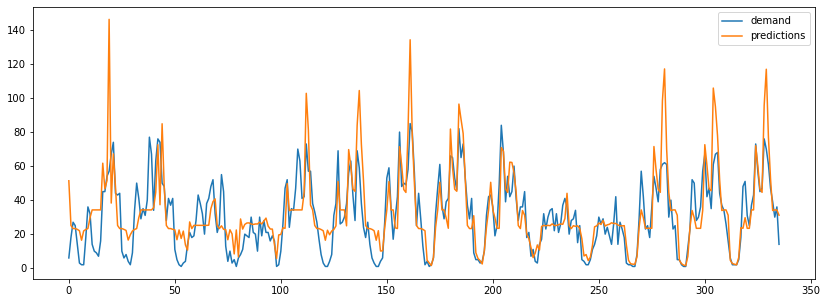

In [63]:
#Plot of demand and predictions
fig, ax = plt.subplots(figsize=(14, 5))

plt.plot(demand, label='demand')
plt.plot(predictions, label = 'predictions')
ax.legend()
plt.show()

In [64]:
#Metrics of the model
mse, mae, rmse, r2 = calculate_metrics(predictions, demand)
evaluation_model_1 = evaluation_model_1.append({'model':'ForecastAutoreg with exog. variables BM', 
                                                'MSE': mse, 'MAE': mae, 'RMSE': rmse,  'R2':r2},
                                             ignore_index=True)
evaluation_model_1

,model,MSE,MAE,RMSE,R2
0,ForecastAutoreg,612.384337,20.105952,24.746400,-4.888336
1,ForecastAutoreg,485.862672,18.281056,22.042293,-11.156086
2,ForecastAutoreg with exog. variables,126.021387,8.160119,11.225925,0.717933
3,ForecastAutoreg with exog. variables BM,225.565887,10.734731,15.018851,0.547796


In [65]:
#Feature importance
feature_importance = forecaster.get_feature_importance()
feature_importance = feature_importance.sort_values(by='importance', ascending = False)
feature_importance

,feature,importance
0,lag_168,1.563384e-01
25,hour_17,6.657001e-02
4,weekday_Sunday,6.284317e-02
3,weekday_Saturday,5.909716e-02
26,hour_18,5.357980e-02
24,hour_16,4.593091e-02
12,hour_4,4.533871e-02
11,hour_3,4.497649e-02
9,hour_1,4.221612e-02
13,hour_5,4.043474e-02


#### Recursive autoregressive model. Linear regression with ridge attenuation

In [66]:
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


In [67]:
#Create and train the forecaster
forecaster = ForecasterAutoreg(regressor = make_pipeline(StandardScaler(), Ridge()),
                              lags = 24*14)
forecaster.fit(y=train['rides'])
forecaster

ForecasterAutoreg 
Regressor: Pipeline(steps=[('standardscaler', StandardScaler()), ('ridge', Ridge())]) 
Lags: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219

We evaluate the model as if each day we predict the next 24 hours

In [68]:
#Backtesting (predictions)
metric, predictions = backtesting_forecaster(forecaster = forecaster,
                                            y = rides_per_zone_1['rides'],
                                            initial_train_size = len(train),
                                            fixed_train_size=False,
                                            steps=24,
                                            metric = 'mean_absolute_error',
                                            refit = False,
                                            verbose=True)

Information of backtesting process
----------------------------------
Number of observations used for initial training or as initial window: 18505
Number of observations used for backtesting: 336
    Number of folds: 14
    Number of steps per fold: 24

Data partition in fold: 0
    Training:   2018-12-31 23:00:00 -- 2021-06-16 18:00:00
    Validation: 2021-06-16 19:00:00 -- 2021-06-17 20:00:00
Data partition in fold: 1
    Training:   2018-12-31 23:00:00 -- 2021-06-16 18:00:00
    Validation: 2021-06-17 21:00:00 -- 2021-06-18 21:00:00
Data partition in fold: 2
    Training:   2018-12-31 23:00:00 -- 2021-06-16 18:00:00
    Validation: 2021-06-18 22:00:00 -- 2021-06-19 21:00:00
Data partition in fold: 3
    Training:   2018-12-31 23:00:00 -- 2021-06-16 18:00:00
    Validation: 2021-06-19 22:00:00 -- 2021-06-20 21:00:00
Data partition in fold: 4
    Training:   2018-12-31 23:00:00 -- 2021-06-16 18:00:00
    Validation: 2021-06-20 22:00:00 -- 2021-06-21 23:00:00
Data partition in fold: 5


In [69]:


predictions = predictions.reset_index()
predictions = predictions['pred']
demand = test['rides']
demand = demand.reset_index()
demand = demand['rides']

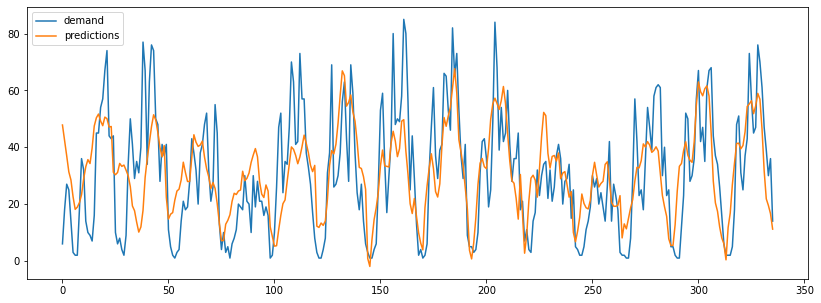

In [70]:
#Plot of demand and predictions
fig, ax = plt.subplots(figsize=(14, 5))

plt.plot(demand, label='demand')
plt.plot(predictions, label = 'predictions')
ax.legend()
plt.show()

In [71]:
#Metrics of the model
mse, mae, rmse, r2 = calculate_metrics(predictions, demand)
evaluation_model_1 = evaluation_model_1.append({'model':'Linear regresion', 
                                                'MSE': mse, 'MAE': mae, 'RMSE': rmse,  'R2':r2},
                                             ignore_index=True)
evaluation_model_1

,model,MSE,MAE,RMSE,R2
0,ForecastAutoreg,612.384337,20.105952,24.746400,-4.888336
1,ForecastAutoreg,485.862672,18.281056,22.042293,-11.156086
2,ForecastAutoreg with exog. variables,126.021387,8.160119,11.225925,0.717933
3,ForecastAutoreg with exog. variables BM,225.565887,10.734731,15.018851,0.547796
4,Linear regresion,240.432612,12.525301,15.505890,-0.139165


In [286]:
###### Optimizing hyperparameters

forecaster = ForecasterAutoreg(regressor = make_pipeline(StandardScaler(),Ridge()),
                              lags = 24)
lags_grid = [[24*7], [24,24*7]]

param_grid = {'ridge__alpha': np.logspace(-3,5,12)}

grid_search = grid_search_forecaster(forecaster = forecaster,
                                     y = rides_per_zone_1['rides'],
                                     param_grid = param_grid,
                                     lags_grid = lags_grid,
                                     steps=24,
                                     metric = 'mean_absolute_error',
                                     initial_train_size = len(train),
                                     fixed_train_size=False,
                                     return_best = True,
                                     verbose=False) 

loop param_grid:   8%|███                                  | 1/12 [00:00<00:01,  6.60it/s]

Number of models compared: 24



loop lags_grid: 100%|███████████████████████████████████████| 2/2 [00:05<00:00,  2.93s/it]

`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [ 24 168] 
  Parameters: {'ridge__alpha': 0.001}
  Backtesting metric: 33.13153973132694



In [91]:
forecaster = ForecasterAutoreg(regressor = make_pipeline(StandardScaler(),Ridge(alpha=0.001)),
                              lags = [24,168])
forecaster

ForecasterAutoreg 
Regressor: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('ridge', Ridge(alpha=0.001))]) 
Lags: [ 24 168] 
Window size: 168 
Included exogenous: False 
Type of exogenous variable: None 
Exogenous variables names: None 
Training range: None 
Training index type: None 
Training index frequency: None 
Regressor parameters: {'standardscaler__copy': True, 'standardscaler__with_mean': True, 'standardscaler__with_std': True, 'ridge__alpha': 0.001, 'ridge__copy_X': True, 'ridge__fit_intercept': True, 'ridge__max_iter': None, 'ridge__normalize': 'deprecated', 'ridge__positive': False, 'ridge__random_state': None, 'ridge__solver': 'auto', 'ridge__tol': 0.001} 
Creation date: 2022-05-29 17:48:31 
Last fit date: None 
Skforecast version: 0.4.3 

In [92]:
#Backtesitng to evaluate model
metric, predictions = backtesting_forecaster(
                            forecaster = forecaster,
                            y          = rides_per_zone_1['rides'],
                            initial_train_size = len(train),
                            fixed_train_size   = False,
                            steps      = 24,
                            metric     = 'mean_absolute_error',
                            refit      = False,
                            verbose    = False
                        )

In [79]:
predictions = predictions.reset_index()
predictions = predictions['pred']
demand = test['rides']
demand = demand.reset_index()
demand = demand['rides']

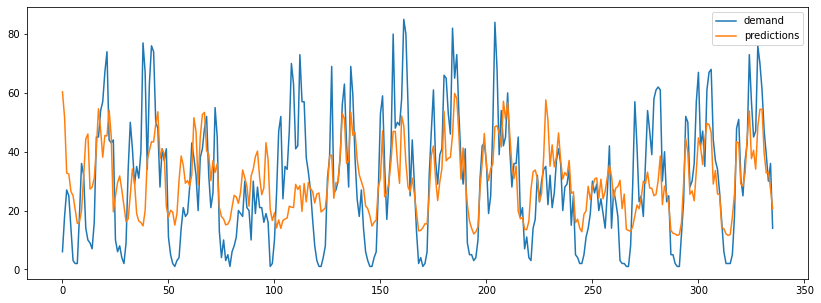

In [80]:
#Plot of demand and predictions
fig, ax = plt.subplots(figsize=(14, 5))

plt.plot(demand, label='demand')
plt.plot(predictions, label = 'predictions')
ax.legend()
plt.show()

In [81]:
#Metrics of the model
mse, mae, rmse, r2 = calculate_metrics(predictions, demand)
evaluation_model_1 = evaluation_model_1.append({'model':'Linear regresion', 
                                                'MSE': mse, 'MAE': mae, 'RMSE': rmse,  'R2':r2},
                                             ignore_index=True)
evaluation_model_1

,model,MSE,MAE,RMSE,R2
0,ForecastAutoreg,612.384337,20.105952,24.746400,-4.888336
1,ForecastAutoreg,485.862672,18.281056,22.042293,-11.156086
2,ForecastAutoreg with exog. variables,126.021387,8.160119,11.225925,0.717933
3,ForecastAutoreg with exog. variables BM,225.565887,10.734731,15.018851,0.547796
4,Linear regresion,240.432612,12.525301,15.505890,-0.139165
5,Linear regresion,264.161275,12.760101,16.253039,-0.958304


#### Including exogenous variables

In [94]:
#Creating and training forecaster
forecaster = ForecasterAutoreg(
                regressor = make_pipeline(StandardScaler(), Ridge(alpha=0.01)),
                lags      = [24,168],
             )

forecaster.fit(y=train['rides'], exog=train[columns_for_model])
forecaster

ForecasterAutoreg 
Regressor: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('ridge', Ridge(alpha=0.01))]) 
Lags: [ 24 168] 
Window size: 168 
Included exogenous: True 
Type of exogenous variable: <class 'pandas.core.frame.DataFrame'> 
Exogenous variables names: ['weekday_Friday', 'weekday_Monday', 'weekday_Saturday', 'weekday_Sunday', 'weekday_Thursday', 'weekday_Tuesday', 'weekday_Wednesday', 'hour_0', 'hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5', 'hour_6', 'hour_7', 'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12', 'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18', 'hour_19', 'hour_20', 'hour_21', 'hour_22', 'hour_23', 'month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'month_12'] 
Training range: [0, 18504] 
Training index type: RangeIndex 
Training index frequency: 1 
Regressor parameters: {'standardscaler__copy': True, 'standardscaler__with_mean': True, 'standards

In [95]:
#Final model
predictions = forecaster.predict(steps=steps,
                                exog = test[columns_for_model])
predictions = predictions.reset_index()
predictions = predictions['pred']
demand = test['rides']
demand = demand.reset_index()
demand = demand['rides']

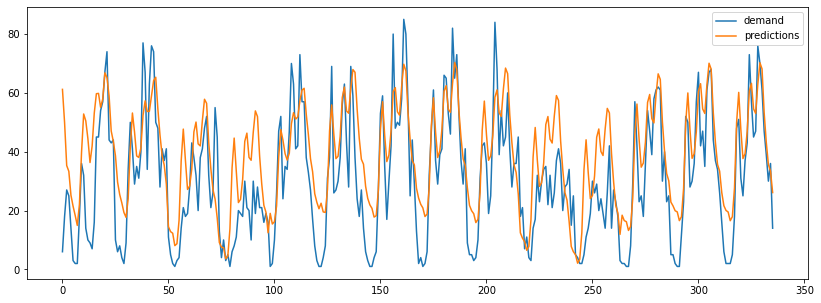

In [96]:
#Plot of demand and predictions
fig, ax = plt.subplots(figsize=(14, 5))

plt.plot(demand, label='demand')
plt.plot(predictions, label = 'predictions')
ax.legend()
plt.show()

In [97]:
#Metrics of the model
mse, mae, rmse, r2 = calculate_metrics(predictions, demand)
evaluation_model_1 = evaluation_model_1.append({'model':'Linear regresion with exogenous variables', 
                                                'MSE': mse, 'MAE': mae, 'RMSE': rmse,  'R2':r2},
                                             ignore_index=True)
evaluation_model_1

,model,MSE,MAE,RMSE,R2
0,ForecastAutoreg,612.384337,20.105952,24.746400,-4.888336
1,ForecastAutoreg,485.862672,18.281056,22.042293,-11.156086
2,ForecastAutoreg with exog. variables,126.021387,8.160119,11.225925,0.717933
3,ForecastAutoreg with exog. variables BM,225.565887,10.734731,15.018851,0.547796
4,Linear regresion,240.432612,12.525301,15.505890,-0.139165
5,Linear regresion,264.161275,12.760101,16.253039,-0.958304
6,Linear regresion with exogenous variables,220.631198,12.014795,14.853659,0.212899


#### Gradient boosting

In [141]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
#pip install catboost
from catboost import CatBoostRegressor

###### XGBoost

In [100]:
forecaster = ForecasterAutoreg(regressor = XGBRegressor(random_state=123),
                              lags = [24,24*7])

forecaster.fit(y=train['rides'])

In [102]:
#Final model
predictions = forecaster.predict(steps=steps)
predictions = predictions.reset_index()
predictions = predictions['pred']
demand = test['rides']
demand = demand.reset_index()
demand = demand['rides']

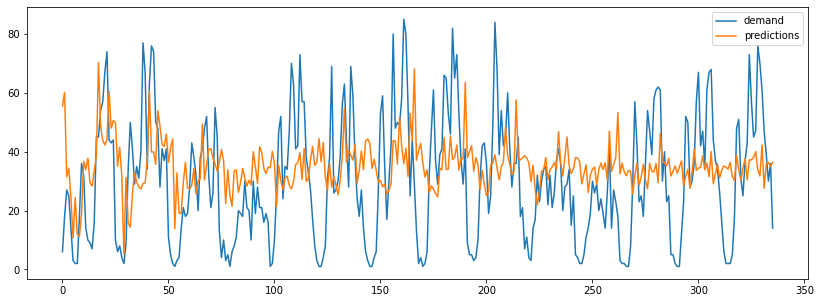

In [103]:
#Plot of demand and predictions
fig, ax = plt.subplots(figsize=(14, 5))

plt.plot(demand, label='demand')
plt.plot(predictions, label = 'predictions')
ax.legend()
plt.show()

In [104]:
#Metrics of the model
mse, mae, rmse, r2 = calculate_metrics(predictions, demand)
evaluation_model_1 = evaluation_model_1.append({'model':'XGBoost', 
                                                'MSE': mse, 'MAE': mae, 'RMSE': rmse,  'R2':r2},
                                             ignore_index=True)
evaluation_model_1

,model,MSE,MAE,RMSE,R2
0,ForecastAutoreg,612.384337,20.105952,24.746400,-4.888336
1,ForecastAutoreg,485.862672,18.281056,22.042293,-11.156086
2,ForecastAutoreg with exog. variables,126.021387,8.160119,11.225925,0.717933
3,ForecastAutoreg with exog. variables BM,225.565887,10.734731,15.018851,0.547796
4,Linear regresion,240.432612,12.525301,15.505890,-0.139165
5,Linear regresion,264.161275,12.760101,16.253039,-0.958304
6,Linear regresion with exogenous variables,220.631198,12.014795,14.853659,0.212899
7,XGBoost,463.208628,17.657295,21.522282,-6.167822


In [106]:
#Grid search to find best combination of hyperparameters

param_grid = {
    'n_estimators': [100,500],
    'max_depth': [3,5,10],
    'learning_rate': [0.01,0.1]
}

lags_grid = [[24,24*7],[24*7]]

grid_search = grid_search_forecaster(forecaster = forecaster,
                                    y = train['rides'],
                                    param_grid = param_grid,
                                    lags_grid = lags_grid,
                                    steps = steps,
                                    refit = False,
                                    metric = 'mean_squared_error',
                                    initial_train_size = int(len(train)*0.5),
                                    return_best=True,
                                    verbose=False)

loop param_grid:   0%|                                             | 0/12 [00:00<?, ?it/s]

Number of models compared: 24



loop lags_grid: 100%|██████████████████████████████████████| 2/2 [05:27<00:00, 163.56s/it]


`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [168] 
  Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}
  Backtesting metric: 491.0853263597743



In [107]:
grid_search

,lags,params,metric,learning_rate,max_depth,n_estimators
13,[168],"{'learning_rate': 0.01, 'max_depth': 3, 'n_est...",491.085326,0.01,3.0,500.0
18,[168],"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",492.950545,0.10,3.0,100.0
15,[168],"{'learning_rate': 0.01, 'max_depth': 5, 'n_est...",495.326950,0.01,5.0,500.0
20,[168],"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",496.941178,0.10,5.0,100.0
19,[168],"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",499.002713,0.10,3.0,500.0
17,[168],"{'learning_rate': 0.01, 'max_depth': 10, 'n_es...",499.050004,0.01,10.0,500.0
23,[168],"{'learning_rate': 0.1, 'max_depth': 10, 'n_est...",500.006307,0.10,10.0,500.0
22,[168],"{'learning_rate': 0.1, 'max_depth': 10, 'n_est...",500.398464,0.10,10.0,100.0
21,[168],"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",500.449321,0.10,5.0,500.0
3,"[24, 168]","{'learning_rate': 0.01, 'max_depth': 5, 'n_est...",507.770470,0.01,5.0,500.0


In [108]:
#Backtesting to evaluate model

metric, predictions = backtesting_forecaster(
    forecaster = forecaster,
    y          = rides_per_zone_1['rides'],
    initial_train_size = len(train),
    steps      = 24,
    refit      = False,
    metric     = 'mean_squared_error',
    verbose    = False
)


In [110]:
predictions = predictions.reset_index()
predictions = predictions['pred']
demand = test['rides']
demand = demand.reset_index()
demand = demand['rides']

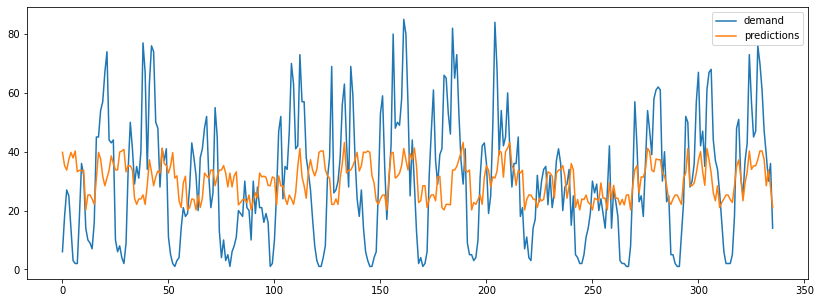

In [111]:
#Plot of demand and predictions
fig, ax = plt.subplots(figsize=(14, 5))

plt.plot(demand, label='demand')
plt.plot(predictions, label = 'predictions')
ax.legend()
plt.show()

In [112]:
#Metrics of the model
mse, mae, rmse, r2 = calculate_metrics(predictions, demand)
evaluation_model_1 = evaluation_model_1.append({'model':'XGBoost', 
                                                'MSE': mse, 'MAE': mae, 'RMSE': rmse,  'R2':r2},
                                             ignore_index=True)
evaluation_model_1

,model,MSE,MAE,RMSE,R2
0,ForecastAutoreg,612.384337,20.105952,24.746400,-4.888336
1,ForecastAutoreg,485.862672,18.281056,22.042293,-11.156086
2,ForecastAutoreg with exog. variables,126.021387,8.160119,11.225925,0.717933
3,ForecastAutoreg with exog. variables BM,225.565887,10.734731,15.018851,0.547796
4,Linear regresion,240.432612,12.525301,15.505890,-0.139165
5,Linear regresion,264.161275,12.760101,16.253039,-0.958304
6,Linear regresion with exogenous variables,220.631198,12.014795,14.853659,0.212899
7,XGBoost,463.208628,17.657295,21.522282,-6.167822
8,XGBoost,402.692365,16.273249,20.067196,-9.590954


###### Including exogenous variables

In [113]:
forecaster = ForecasterAutoreg(
                regressor = XGBRegressor(random_state=123),
                lags = 24*7
             )

In [115]:
#Grid search to find best combination of hyperparameters

param_grid = {
    'n_estimators': [100,500],
    'max_depth': [3,5,10],
    'learning_rate': [0.01,0.1]
}

lags_grid = [[24,24*7],[24*7]]

grid_search = grid_search_forecaster(forecaster = forecaster,
                                    y = train['rides'],
                                    exog = train[columns_for_model],
                                    param_grid = param_grid,
                                    lags_grid = lags_grid,
                                    steps = steps,
                                    refit = False,
                                    metric = 'mean_squared_error',
                                    initial_train_size = int(len(train)*0.5),
                                    return_best=True,
                                    verbose=False)

loop param_grid:   0%|                                             | 0/12 [00:00<?, ?it/s]

Number of models compared: 24



loop lags_grid: 100%|██████████████████████████████████████| 2/2 [06:42<00:00, 201.28s/it]


`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [168] 
  Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
  Backtesting metric: 255.16785949008235



In [117]:
#Backtesting to evaluate model

metric, predictions = backtesting_forecaster(
    forecaster = forecaster,
    y          = rides_per_zone_1['rides'],
    exog = rides_per_zone_1[columns_for_model],
    initial_train_size = len(train),
    steps      = 24,
    refit      = False,
    metric     = 'mean_squared_error',
    verbose    = False
)


In [120]:
#Feature importance
feature_importance = forecaster.get_feature_importance()
feature_importance.sort_values(by='importance', ascending = False, inplace=True)
feature_importance

,feature,importance
25,hour_17,0.076648
12,hour_4,0.071671
8,hour_0,0.070207
9,hour_1,0.070026
26,hour_18,0.067535
21,hour_13,0.066776
10,hour_2,0.065296
11,hour_3,0.064972
15,hour_7,0.038857
31,hour_23,0.038321


In [122]:
predictions

,pred
168,51.026745
169,41.508591
170,37.090336
171,34.384392
172,22.433264
...,...
187,50.941528
188,40.853676
189,37.090336
190,33.729477


In [123]:
predictions = predictions.reset_index()
predictions = predictions['pred']
demand = test['rides']
demand = demand.reset_index()
demand = demand['rides']

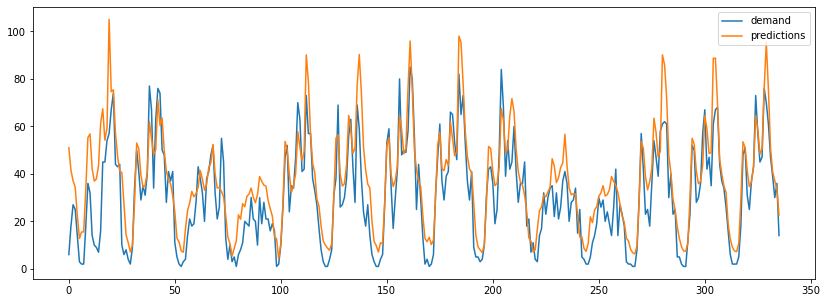

In [124]:
#Plot of demand and predictions
fig, ax = plt.subplots(figsize=(14, 5))

plt.plot(demand, label='demand')
plt.plot(predictions, label = 'predictions')
ax.legend()
plt.show()

In [126]:
#Metrics of the model
mse, mae, rmse, r2 = calculate_metrics(predictions, demand)
evaluation_model_1 = evaluation_model_1.append({'model':'XGBoost with exogenous variables', 
                                                'MSE': mse, 'MAE': mae, 'RMSE': rmse,  'R2':r2},
                                             ignore_index=True)
evaluation_model_1

,model,MSE,MAE,RMSE,R2
0,ForecastAutoreg,612.384337,20.105952,24.746400,-4.888336
1,ForecastAutoreg,485.862672,18.281056,22.042293,-11.156086
2,ForecastAutoreg with exog. variables,126.021387,8.160119,11.225925,0.717933
3,ForecastAutoreg with exog. variables BM,225.565887,10.734731,15.018851,0.547796
4,Linear regresion,240.432612,12.525301,15.505890,-0.139165
5,Linear regresion,264.161275,12.760101,16.253039,-0.958304
6,Linear regresion with exogenous variables,220.631198,12.014795,14.853659,0.212899
7,XGBoost,463.208628,17.657295,21.522282,-6.167822
8,XGBoost,402.692365,16.273249,20.067196,-9.590954
9,XGBoost,148.024394,9.359359,12.166528,0.640831


###### LightGBM

In [129]:
forecaster = ForecasterAutoreg(regressor = LGBMRegressor(random_state=123),
                              lags=[24,24*7])
forecaster

ForecasterAutoreg 
Regressor: LGBMRegressor(random_state=123) 
Lags: [ 24 168] 
Window size: 168 
Included exogenous: False 
Type of exogenous variable: None 
Exogenous variables names: None 
Training range: None 
Training index type: None 
Training index frequency: None 
Regressor parameters: {'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 1.0, 'importance_type': 'split', 'learning_rate': 0.1, 'max_depth': -1, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 100, 'n_jobs': -1, 'num_leaves': 31, 'objective': None, 'random_state': 123, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'silent': 'warn', 'subsample': 1.0, 'subsample_for_bin': 200000, 'subsample_freq': 0} 
Creation date: 2022-05-29 18:43:58 
Last fit date: None 
Skforecast version: 0.4.3 

In [130]:
#Grid search to find best combination of hyperparameters

param_grid = {
    'n_estimators': [100,500],
    'max_depth': [3,5,10],
    'learning_rate': [0.01,0.1]
}

lags_grid = [[24,24*7],[24*7]]

grid_search = grid_search_forecaster(forecaster = forecaster,
                                    y = train['rides'],
                                    exog = train[columns_for_model],
                                    param_grid = param_grid,
                                    lags_grid = lags_grid,
                                    steps = steps,
                                    refit = False,
                                    metric = 'mean_squared_error',
                                    initial_train_size = int(len(train)*0.75),
                                    return_best=True,
                                    verbose=False)

loop param_grid:   0%|                                             | 0/12 [00:00<?, ?it/s]

Number of models compared: 24



loop lags_grid: 100%|███████████████████████████████████████| 2/2 [00:23<00:00, 11.64s/it]


`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [168] 
  Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500}
  Backtesting metric: 203.88079549777



In [131]:
#Backtesting to evaluate model

metric, predictions = backtesting_forecaster(
    forecaster = forecaster,
    y          = rides_per_zone_1['rides'],
    exog = rides_per_zone_1[columns_for_model],
    initial_train_size = len(train),
    steps      = 24,
    refit      = False,
    metric     = 'mean_squared_error',
    verbose    = False
)


In [132]:
#Feature importance
feature_importance = forecaster.get_feature_importance()
feature_importance.sort_values(by='importance', ascending = False, inplace=True)
feature_importance

,feature,importance
0,lag_168,874
3,weekday_Saturday,251
4,weekday_Sunday,249
14,hour_6,129
36,month_5,95
24,hour_16,85
40,month_9,81
37,month_6,80
1,weekday_Friday,75
32,month_1,74


In [133]:
predictions = predictions.reset_index()
predictions = predictions['pred']
demand = test['rides']
demand = demand.reset_index()
demand = demand['rides']

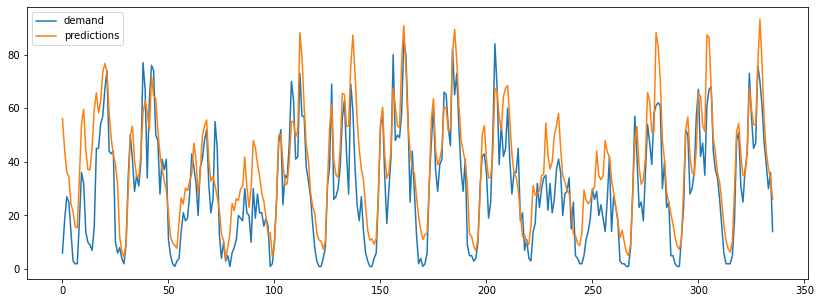

In [136]:
#Plot of demand and predictions
fig, ax = plt.subplots(figsize=(14, 5))

plt.plot(demand, label='demand')
plt.plot(predictions, label = 'predictions')
ax.legend()
plt.show()

In [137]:
#Metrics of the model
mse, mae, rmse, r2 = calculate_metrics(predictions, demand)
evaluation_model_1 = evaluation_model_1.append({'model':'LightGBM with exogenous variables', 
                                                'MSE': mse, 'MAE': mae, 'RMSE': rmse,  'R2':r2},
                                             ignore_index=True)
evaluation_model_1

,model,MSE,MAE,RMSE,R2
0,ForecastAutoreg,612.384337,20.105952,24.746400,-4.888336
1,ForecastAutoreg,485.862672,18.281056,22.042293,-11.156086
2,ForecastAutoreg with exog. variables,126.021387,8.160119,11.225925,0.717933
3,ForecastAutoreg with exog. variables BM,225.565887,10.734731,15.018851,0.547796
4,Linear regresion,240.432612,12.525301,15.505890,-0.139165
5,Linear regresion,264.161275,12.760101,16.253039,-0.958304
6,Linear regresion with exogenous variables,220.631198,12.014795,14.853659,0.212899
7,XGBoost,463.208628,17.657295,21.522282,-6.167822
8,XGBoost,402.692365,16.273249,20.067196,-9.590954
9,XGBoost,148.024394,9.359359,12.166528,0.640831


###### CatBoost

In [142]:
forecaster = ForecasterAutoreg(regressor = CatBoostRegressor(random_state=123, silent=True),
                              lags = [24*7,24])

In [143]:
#Grid search to find best combination of hyperparameters

param_grid = {
    'n_estimators': [100,500],
    'max_depth': [3,5,10],
    'learning_rate': [0.01,0.1]
}

lags_grid = [[24,24*7],[24*7]]

grid_search = grid_search_forecaster(forecaster = forecaster,
                                    y = train['rides'],
                                    exog = train[columns_for_model],
                                    param_grid = param_grid,
                                    lags_grid = lags_grid,
                                    steps = steps,
                                    refit = False,
                                    metric = 'mean_squared_error',
                                    initial_train_size = int(len(train)*0.75),
                                    return_best=True,
                                    verbose=False)

loop param_grid:   0%|                                             | 0/12 [00:00<?, ?it/s]

Number of models compared: 24



loop lags_grid: 100%|███████████████████████████████████████| 2/2 [01:54<00:00, 57.15s/it]


`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [168] 
  Parameters: {'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 500}
  Backtesting metric: 201.00387823029916



In [144]:
#Backtesting to evaluate model

metric, predictions = backtesting_forecaster(
    forecaster = forecaster,
    y          = rides_per_zone_1['rides'],
    exog = rides_per_zone_1[columns_for_model],
    initial_train_size = len(train),
    steps      = 24,
    refit      = False,
    metric     = 'mean_squared_error',
    verbose    = False
)


In [145]:
#Feature importance
feature_importance = forecaster.get_feature_importance()
feature_importance.sort_values(by='importance', ascending = False, inplace=True)
feature_importance

,feature,importance
4,weekday_Sunday,9.023483
25,hour_17,6.704704
3,weekday_Saturday,6.616782
26,hour_18,5.824896
12,hour_4,5.458425
11,hour_3,5.080713
9,hour_1,4.701934
0,lag_168,4.695630
8,hour_0,4.584209
10,hour_2,4.247635


In [146]:
predictions = predictions.reset_index()
predictions = predictions['pred']
demand = test['rides']
demand = demand.reset_index()
demand = demand['rides']

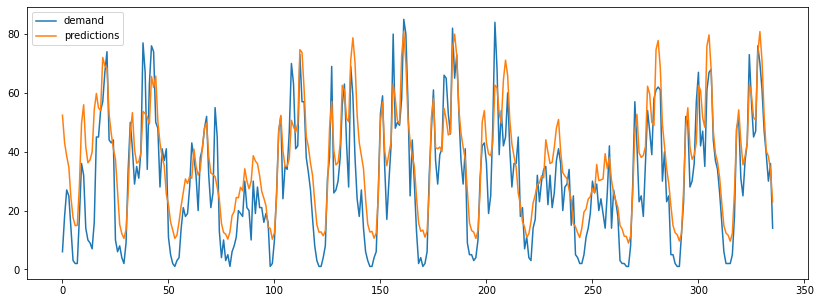

In [147]:
#Plot of demand and predictions
fig, ax = plt.subplots(figsize=(14, 5))

plt.plot(demand, label='demand')
plt.plot(predictions, label = 'predictions')
ax.legend()
plt.show()

In [148]:
#Metrics of the model
mse, mae, rmse, r2 = calculate_metrics(predictions, demand)
evaluation_model_1 = evaluation_model_1.append({'model':'CatBoost with exogenous variables', 
                                                'MSE': mse, 'MAE': mae, 'RMSE': rmse,  'R2':r2},
                                             ignore_index=True)
evaluation_model_1

,model,MSE,MAE,RMSE,R2
0,ForecastAutoreg,612.384337,20.105952,24.746400,-4.888336
1,ForecastAutoreg,485.862672,18.281056,22.042293,-11.156086
2,ForecastAutoreg with exog. variables,126.021387,8.160119,11.225925,0.717933
3,ForecastAutoreg with exog. variables BM,225.565887,10.734731,15.018851,0.547796
4,Linear regresion,240.432612,12.525301,15.505890,-0.139165
5,Linear regresion,264.161275,12.760101,16.253039,-0.958304
6,Linear regresion with exogenous variables,220.631198,12.014795,14.853659,0.212899
7,XGBoost,463.208628,17.657295,21.522282,-6.167822
8,XGBoost,402.692365,16.273249,20.067196,-9.590954
9,XGBoost,148.024394,9.359359,12.166528,0.640831


##### Choosing the best model to predict the demand

Now that we have developed different models to predict the demand we are going to choose the model with the best results, so we will use this model to predict the demand of the next 24 hours, now training the model with all the data, not only with the train data

In [150]:
evaluation_model_1.sort_values(by = 'MSE', ascending=True, inplace=True)
evaluation_model_1

,model,MSE,MAE,RMSE,R2
2,ForecastAutoreg with exog. variables,126.021387,8.160119,11.225925,0.717933
12,CatBoost with exogenous variables,135.422503,9.448658,11.637117,0.572822
9,XGBoost,148.024394,9.359359,12.166528,0.640831
10,XGBoost with exogenous variables,148.024394,9.359359,12.166528,0.640831
11,LightGBM with exogenous variables,162.126665,9.987354,12.732897,0.598108
6,Linear regresion with exogenous variables,220.631198,12.014795,14.853659,0.212899
3,ForecastAutoreg with exog. variables BM,225.565887,10.734731,15.018851,0.547796
4,Linear regresion,240.432612,12.525301,15.505890,-0.139165
5,Linear regresion,264.161275,12.760101,16.253039,-0.958304
8,XGBoost,402.692365,16.273249,20.067196,-9.590954


We are going to use the ForecastAutoreg with exogenous variables to predict demand

In [151]:
#Create and train forecaster
forecaster = ForecasterAutoreg(regressor = RandomForestRegressor(random_state=123),
                              lags = [24,48,72,96,120,144,168])
forecaster.fit(y=rides_per_zone_1['rides'], exog = rides_per_zone_1[columns_for_model])
forecaster

ForecasterAutoreg 
Regressor: RandomForestRegressor(random_state=123) 
Lags: [ 24  48  72  96 120 144 168] 
Window size: 168 
Included exogenous: True 
Type of exogenous variable: <class 'pandas.core.frame.DataFrame'> 
Exogenous variables names: ['weekday_Friday', 'weekday_Monday', 'weekday_Saturday', 'weekday_Sunday', 'weekday_Thursday', 'weekday_Tuesday', 'weekday_Wednesday', 'hour_0', 'hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5', 'hour_6', 'hour_7', 'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12', 'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18', 'hour_19', 'hour_20', 'hour_21', 'hour_22', 'hour_23', 'month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'month_12'] 
Training range: [0, 18840] 
Training index type: RangeIndex 
Training index frequency: 1 
Regressor parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 'auto', 'max_l

In [159]:
last_day_data = rides_per_zone_1[-1:]
last_day_data = last_day_data.index[0]

In [169]:
columns_for_model

['weekday_Friday',
 'weekday_Monday',
 'weekday_Saturday',
 'weekday_Sunday',
 'weekday_Thursday',
 'weekday_Tuesday',
 'weekday_Wednesday',
 'hour_0',
 'hour_1',
 'hour_2',
 'hour_3',
 'hour_4',
 'hour_5',
 'hour_6',
 'hour_7',
 'hour_8',
 'hour_9',
 'hour_10',
 'hour_11',
 'hour_12',
 'hour_13',
 'hour_14',
 'hour_15',
 'hour_16',
 'hour_17',
 'hour_18',
 'hour_19',
 'hour_20',
 'hour_21',
 'hour_22',
 'hour_23',
 'month_1',
 'month_2',
 'month_3',
 'month_4',
 'month_5',
 'month_6',
 'month_7',
 'month_8',
 'month_9',
 'month_10',
 'month_11',
 'month_12']

In [185]:
exogenous_variables = pd.date_range(last_day_data, periods = 365*24,freq='H')
exogenous_variables = pd.DataFrame(exogenous_variables, columns = ['datetime'])
exogenous_variables = exogenous_variables[1:]
exogenous_variables['hour'] = exogenous_variables['datetime'].dt.hour
exogenous_variables['month'] = exogenous_variables['datetime'].dt.month
exogenous_variables['weekday'] = exogenous_variables['datetime'].dt.day_name()
exogenous_variables.reset_index(inplace=True)
exogenous_variables = pd.get_dummies(exogenous_variables, columns = ['weekday', 'hour', 'month'])
exogenous_variables = exogenous_variables[:steps]
exogenous_variables

,index,datetime,weekday_Friday,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,hour_0,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,1,2021-07-01 00:00:00,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1,2,2021-07-01 01:00:00,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,3,2021-07-01 02:00:00,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,4,2021-07-01 03:00:00,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,5,2021-07-01 04:00:00,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,332,2021-07-14 19:00:00,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
332,333,2021-07-14 20:00:00,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
333,334,2021-07-14 21:00:00,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
334,335,2021-07-14 22:00:00,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [190]:
predictions = forecaster.predict(steps=steps,
                                exog = exogenous_variables[columns_for_model])
predictions = predictions.reset_index()
predictions

,index,pred
0,18841,14.20
1,18842,3.47
2,18843,2.88
3,18844,3.66
4,18845,5.89
...,...,...
331,19172,44.47
332,19173,30.95
333,19174,29.24
334,19175,26.35


In [197]:
predictions_zone_1 = pd.concat([predictions, exogenous_variables], axis = 1)
predictions_zone_1 = predictions_zone_1[['pred', 'datetime']]
predictions_zone_1['hour'] = predictions_zone_1['datetime'].dt.hour
predictions_zone_1['day'] = predictions_zone_1['datetime'].dt.date
predictions_zone_1['model'] = 'RandomForest'
predictions_zone_1

,pred,datetime,hour,day,model
0,14.20,2021-07-01 00:00:00,0,2021-07-01,RandomForest
1,3.47,2021-07-01 01:00:00,1,2021-07-01,RandomForest
2,2.88,2021-07-01 02:00:00,2,2021-07-01,RandomForest
3,3.66,2021-07-01 03:00:00,3,2021-07-01,RandomForest
4,5.89,2021-07-01 04:00:00,4,2021-07-01,RandomForest
...,...,...,...,...,...
331,44.47,2021-07-14 19:00:00,19,2021-07-14,RandomForest
332,30.95,2021-07-14 20:00:00,20,2021-07-14,RandomForest
333,29.24,2021-07-14 21:00:00,21,2021-07-14,RandomForest
334,26.35,2021-07-14 22:00:00,22,2021-07-14,RandomForest


###### Dataframe with predictions

We are going to create a dataframe where we are going to store all the predictions of all the zones. We will save it into a csv file to use it in the frontend

In [201]:
predictions_per_zone = predictions_zone_1
predictions_per_zone.to_csv("predictions_per_zone.csv")